In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('../dataframe/champions.csv')  
df.head(5)  

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,125,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,126,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,127,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,128,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,129,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387


In [4]:
# Eliminar la columna 'Temporada' y 'Ronda' ya que son categóricas y no se pueden convertir directamente a flotante
df = df.drop(columns=['Temporada', 'Ronda', 'Evento'])
df.head(5)

,idPartido,Local,Visitante,GolesLocal,GolesVisitante,VictoriaLocal,Empate,VictoriaVisitante,%_Victorias_Local,%_Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,125,235,11,1,0,1,0,0,100.0,0.0,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,126,14,153,3,0,1,0,0,0.0,100.0,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,127,15,1,0,3,0,0,1,100.0,0.0,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,128,10,298,2,0,1,0,0,0.0,0.0,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,129,184,2,1,1,0,1,0,100.0,0.0,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387


In [5]:
df.columns

Index(['idPartido', 'Local', 'Visitante', 'GolesLocal', 'GolesVisitante',
       'VictoriaLocal', 'Empate', 'VictoriaVisitante', '%_Victorias_Local',
       '%_Empate', '%_Victoria_Visitante', '%_Equipo1_Ganado',
       '%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L',
       '%_1_E_Temporada_L', '%_1_P_Temporada_L', '1_Media_G',
       '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores',
       '1_MediaJugadores', '%_2_G_Temporada', '%_2_G_Temporada_L',
       '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G',
       '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores',
       '2_MediaJugadores'],
      dtype='object')

In [6]:
numeric_features = ['GolesLocal', 'GolesVisitante', '%_Victorias_Local', '%_Empate', '%_Victoria_Visitante',
                    '%_Equipo1_Ganado', '%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', '%_1_P_Temporada_L',
                    '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores',
                    '%_2_G_Temporada', '%_2_G_Temporada_L', '%_2_E_Temporada_L', '%_2_P_Temporada_L',
                    '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']

stats = df[numeric_features].describe()
print(stats)

        GolesLocal  GolesVisitante  %_Victorias_Local     %_Empate  \
count  2494.000000     2494.000000        2494.000000  2494.000000   
mean      1.609463        1.199679          47.197045    22.482931   
std       1.422643        1.237624          39.876423    33.914545   
min       0.000000        0.000000           0.000000     0.000000   
25%       1.000000        0.000000           0.000000     0.000000   
50%       1.000000        1.000000          42.860000     0.000000   
75%       2.000000        2.000000         100.000000    33.330000   
max       8.000000        8.000000         100.000000   100.000000   

       %_Victoria_Visitante  %_Equipo1_Ganado  %_Equipo2_Ganado  \
count           2494.000000       2494.000000       2494.000000   
mean              30.078829         33.336704         43.939218   
std               37.212550         38.987189         41.493038   
min                0.000000          0.000000          0.000000   
25%                0.000000       

En promedio, se marcan más goles en casa (1.61 goles) que fuera (1.20 goles). Sin embargo, la diferencia no es significativa. El porcentaje promedio de victorias en casa es del 47.55%, mientras que el porcentaje promedio de victorias como visitante es del 30.07%. Esto sugiere que los equipos tienen una ligera ventaja al jugar en casa. El porcentaje promedio de empates es del 22.37%. Esto indica que aproximadamente una de cada cinco partidos termina en empate.

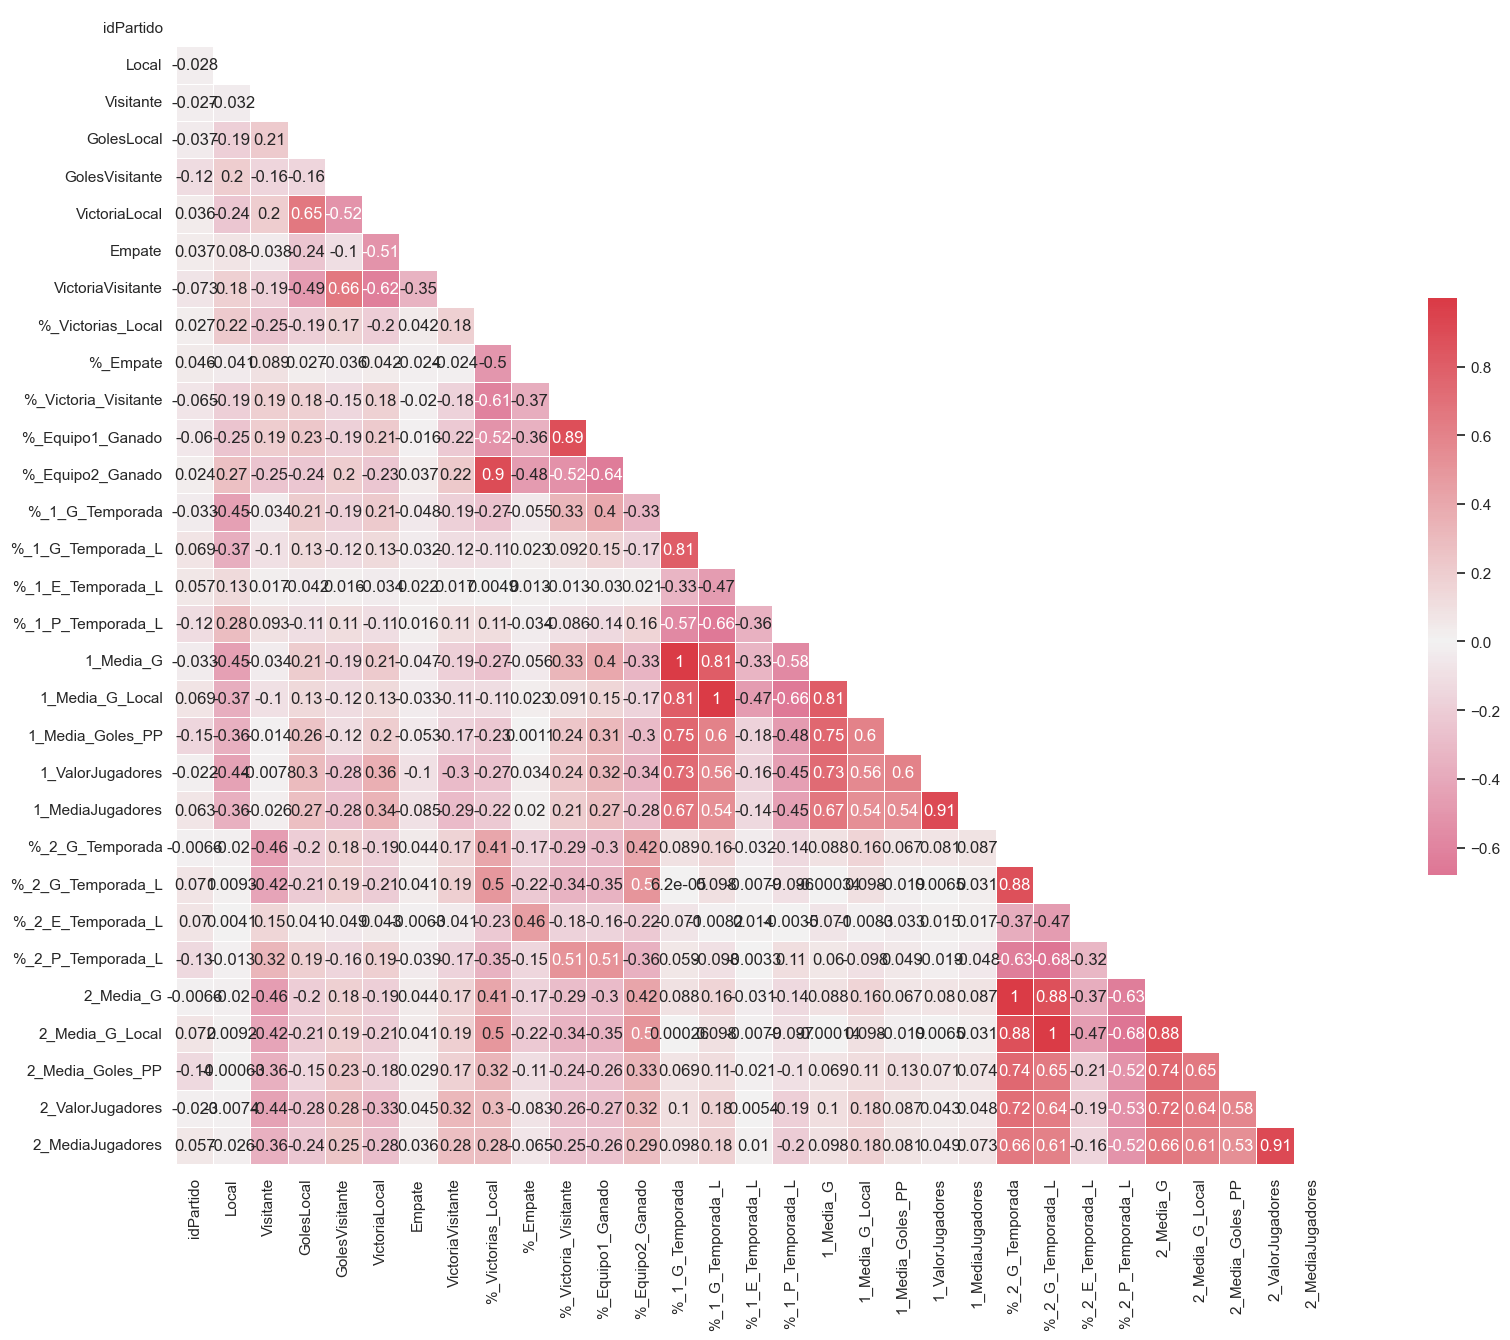

In [7]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(25, 15))
sns.set(style='white')

mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(matriz_correlacion,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

In [8]:
import pandas as pd

# Suponiendo que tu DataFrame se llama df
correlation_local = df.corrwith(df['GolesLocal']).sort_values(ascending=False)


print("Correlación con GolesLocal:")
print(correlation_local)

Correlación con GolesLocal:
GolesLocal              1.000000
VictoriaLocal           0.653762
1_ValorJugadores        0.298209
1_MediaJugadores        0.274538
1_Media_Goles_PP        0.257841
%_Equipo1_Ganado        0.230971
Visitante               0.214415
1_Media_G               0.210737
%_1_G_Temporada         0.210070
%_2_P_Temporada_L       0.189711
%_Victoria_Visitante    0.184483
%_1_G_Temporada_L       0.134479
1_Media_G_Local         0.134166
%_2_E_Temporada_L       0.041189
%_Empate                0.027059
idPartido              -0.037385
%_1_E_Temporada_L      -0.042308
%_1_P_Temporada_L      -0.105974
2_Media_Goles_PP       -0.153497
GolesVisitante         -0.157085
Local                  -0.189960
%_Victorias_Local      -0.191883
%_2_G_Temporada        -0.197016
2_Media_G              -0.197034
%_2_G_Temporada_L      -0.208581
2_Media_G_Local        -0.208825
%_Equipo2_Ganado       -0.235975
2_MediaJugadores       -0.238991
Empate                 -0.244921
2_ValorJugadore

In [9]:
correlation_visitor = df.corrwith(df['GolesVisitante']).sort_values(ascending=False)

print("\nCorrelación con GolesVisitante:")
print(correlation_visitor)



Correlación con GolesVisitante:
GolesVisitante          1.000000
VictoriaVisitante       0.655220
2_ValorJugadores        0.279697
2_MediaJugadores        0.251099
2_Media_Goles_PP        0.227646
%_Equipo2_Ganado        0.203621
Local                   0.195764
2_Media_G_Local         0.188809
%_2_G_Temporada_L       0.188677
2_Media_G               0.184165
%_2_G_Temporada         0.184140
%_Victorias_Local       0.166516
%_1_P_Temporada_L       0.113031
%_1_E_Temporada_L       0.015750
%_Empate               -0.036132
%_2_E_Temporada_L      -0.049181
Empate                 -0.103742
1_Media_G_Local        -0.119201
%_1_G_Temporada_L      -0.119761
idPartido              -0.121094
1_Media_Goles_PP       -0.121649
%_Victoria_Visitante   -0.146202
GolesLocal             -0.157085
Visitante              -0.160943
%_2_P_Temporada_L      -0.161690
%_Equipo1_Ganado       -0.185941
%_1_G_Temporada        -0.186686
1_Media_G              -0.186909
1_MediaJugadores       -0.279198
1_ValorJug

In [10]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

def preprocesamiento(data, columnas_numericas):
    # Aplicar transformación de potencia a las características
    pt = PowerTransformer()
    X_transformed = pt.fit_transform(columnas_numericas)
    
    # Convertir el resultado en un DataFrame con los mismos nombres de columnas
    X_transformed_df = pd.DataFrame(X_transformed, columns=columnas_numericas.columns)
    
    # Normalizar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_transformed_df)
    
    # Convertir el resultado en un DataFrame con los mismos nombres de columnas
    X_scaled_df = pd.DataFrame(X_scaled, columns=X_transformed_df.columns)
    
    return X_scaled_df

X_scaled_df = preprocesamiento(df, columnas_numericas)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle


# Calcular el número necesario de filas y columnas para los subplots
num_filas = (len(columnas_numericas) + 2) // 3  # Asegura al menos 3 subgráficos por fila
num_columnas = min(len(columnas_numericas), 3)


# Crear subplots
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(12, 15))

# Crear un iterador cíclico sobre la paleta de colores
color_palette = cycle(sns.color_palette())

# Iterar sobre las columnas numéricas y los subplots
for colum, ax in zip(columnas_numericas, axes.flat):
    sns.histplot(
        data    = X_scaled_df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = next(color_palette),  # Obtener el próximo color en el ciclo
        ax      = ax
    )
    ax.set_title(colum, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.set_xlabel("")

# Ajustar diseño y mostrar el gráfico
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas', fontsize=12)
plt.show()

/var/folders/98/7bgvzcwx7tz2bgwyh060mq100000gn/T/ipykernel_68642/1360616449.py:32: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


KeyboardInterrupt: 

In [12]:
# Separar características y etiquetas
X = X_scaled_df.drop(columns=['idPartido', 'GolesLocal', 'GolesVisitante', 'VictoriaLocal', 'Empate', 'VictoriaVisitante'])  # Características
y_local = df['GolesLocal']
y_visitante = df['GolesVisitante']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_local_train, y_local_test = train_test_split(X, y_local, test_size=0.30, random_state=0)
_, _, y_visitante_train, y_visitante_test = train_test_split(X, y_visitante, test_size=0.30, random_state=0)


print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 1745 rows
Test Set: 749 rows


In [14]:
X_train

,Local,Visitante,%_Victorias_Local,%_Empate,%_Victoria_Visitante,%_Equipo1_Ganado,%_Equipo2_Ganado,%_1_G_Temporada,%_1_G_Temporada_L,%_1_E_Temporada_L,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
2218,-0.138394,0.429066,0.100626,1.093005,0.767031,-1.034187,0.765066,0.302863,1.349705,-1.047233,...,0.264130,1.130996,1.074562,0.322267,-1.488170,1.219013,1.165441,0.885311,0.788044,0.517139
1280,0.487296,1.803133,-1.362854,-0.854367,1.275568,1.217958,-1.249373,0.799925,0.232490,0.695145,...,0.778911,0.872501,-0.386864,-1.272481,1.200314,0.885664,-0.542347,0.325780,-1.065943,-0.552495
491,0.711682,0.069806,0.775092,0.999928,-1.024589,0.562379,0.558790,1.214045,0.479841,0.576726,...,0.738579,1.258292,1.074562,-1.272481,-0.047139,1.363549,1.165441,1.148867,1.178922,1.003115
106,0.185847,-1.632715,0.100626,1.093005,0.767031,0.697091,0.292238,0.302863,0.636697,0.850151,...,-0.470038,0.289469,0.684612,-1.272481,0.404979,0.190335,0.677541,-0.034281,1.272333,1.267083
2161,-0.590900,1.950186,1.067474,-0.854367,-1.024589,-1.034187,1.081704,-0.298356,-0.223518,0.850151,...,0.140645,0.062852,-0.386864,-1.272481,1.200314,-0.035475,-0.542347,-1.340594,-0.696137,-0.637245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1.786019,0.934998,1.067474,-0.854367,-1.024589,-1.034187,1.081704,-0.690694,0.232490,-1.047233,...,-0.785805,-1.104736,-0.688591,1.107190,0.138152,-1.158217,-0.816530,-0.383517,-0.017033,0.325328
1731,-1.414134,-0.805264,0.568752,0.923305,0.529671,0.974996,-0.005961,0.585823,0.232490,0.481437,...,1.547919,1.551576,0.482768,0.322267,-0.047139,1.753775,0.419553,1.174691,0.830493,0.084601
763,0.041309,0.271045,0.664101,-0.854367,0.767031,1.025057,0.292238,0.761402,0.934379,-1.047233,...,1.216846,-0.431754,-0.688591,1.107190,0.138152,-0.521281,-0.816530,-0.143271,0.165143,-0.630264
835,0.426614,0.832754,1.067474,-0.854367,-1.024589,-1.034187,1.081704,0.186635,0.232490,-1.047233,...,-0.924506,0.760105,0.930216,-1.272481,0.138152,0.744500,0.976464,-0.143271,0.020485,-0.038584


In [15]:
from sklearn.linear_model import LinearRegression

# Entrenar el modelo para predecir los goles locales
model_local = LinearRegression().fit(X_train, y_local_train)
print("Modelo para goles locales entrenado.")

# Entrenar el modelo para predecir los goles visitantes
model_visitante = LinearRegression().fit(X_train, y_visitante_train)
print("Modelo para goles visitantes entrenado.")

Modelo para goles locales entrenado.
Modelo para goles visitantes entrenado.


In [16]:
def visualize_regression(model, X_test, y_test):
    # Hacer predicciones en el conjunto de prueba
    predictions = model.predict(X_test)

    # Visualizar el gráfico de dispersión de las etiquetas reales vs las predicciones
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')

    # Añadir una línea de regresión
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test, p(y_test), color='magenta')
    plt.show()

Visualización del modelo para goles locales:


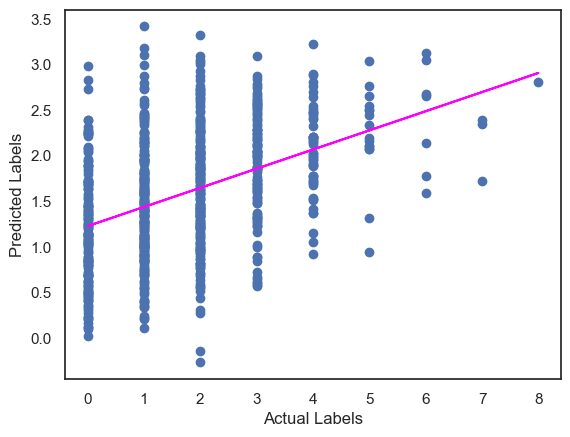

Visualización del modelo para goles visitantes:


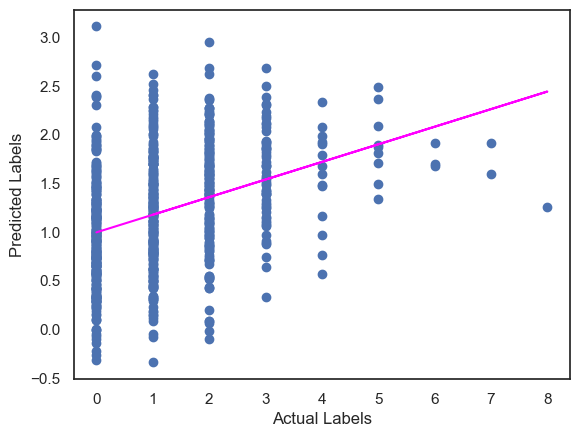

In [17]:
print("Visualización del modelo para goles locales:")
visualize_regression(model_local, X_test, y_local_test)

print("Visualización del modelo para goles visitantes:")
visualize_regression(model_visitante, X_test, y_visitante_test)

In [18]:
#Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_regression_model(model, X_test, y_test):
    # Hacer predicciones en el conjunto de prueba
    predictions = model.predict(X_test)

    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    # Calcular la raíz del error cuadrático medio (RMSE)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)

    # Calcular el coeficiente de determinación (R^2)
    r2 = r2_score(y_test, predictions)
    print("R2:", r2)

    return mse, rmse, r2

In [19]:
print("Evaluación del modelo para goles locales:")
mse_lineal_local, rmse_lineal_local, r2_lineal_local = evaluate_regression_model(model_local, X_test, y_local_test)

print("Evaluación del modelo para goles visitantes:")
mse_lineal_visitante, rmse_lineal_visitante, r2_lineal_visitante = evaluate_regression_model(model_visitante, X_test, y_visitante_test)

Evaluación del modelo para goles locales:
MSE: 1.6262346734734578
RMSE: 1.27523906522403
R2: 0.16848562580248294
Evaluación del modelo para goles visitantes:
MSE: 1.3156545123654286
RMSE: 1.1470198395692328
R2: 0.11444928445096336


#### Lasso algorithm

Modelo Lasso para goles locales entrenado.
Modelo Lasso para goles visitantes entrenado.
Evaluación del modelo Lasso para goles locales:
MSE: 1.9781952985120983
RMSE: 1.4064833090058688
R2: -0.011476297064456187
Evaluación del modelo Lasso para goles visitantes:
MSE: 1.4872298809449183
RMSE: 1.2195203487211348
R2: -0.0010359656569731701
Visualización del modelo Lasso para goles locales:


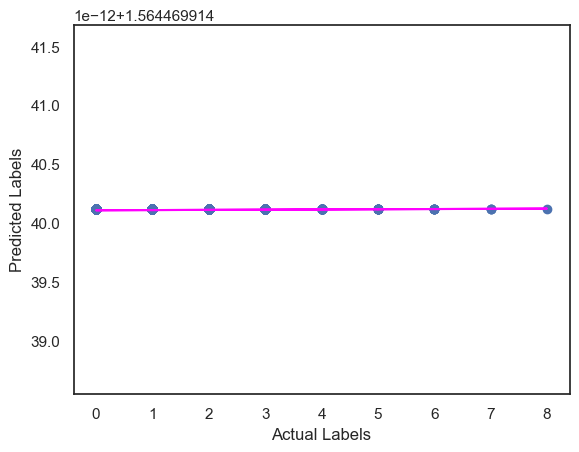

Visualización del modelo Lasso para goles visitantes:


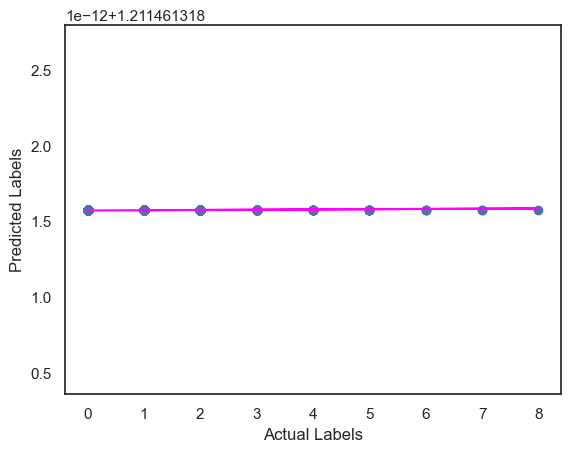

In [20]:
from sklearn.linear_model import Lasso

# Entrenamiento del modelo Lasso para predecir los goles locales
model_lasso_local = Lasso().fit(X_train, y_local_train)
print("Modelo Lasso para goles locales entrenado.")

# Entrenamiento del modelo Lasso para predecir los goles visitantes
model_lasso_visitante = Lasso().fit(X_train, y_visitante_train)
print("Modelo Lasso para goles visitantes entrenado.")

# Evaluación del modelo Lasso para goles locales
print("Evaluación del modelo Lasso para goles locales:")
evaluate_regression_model(model_lasso_local, X_test, y_local_test)

# Evaluación del modelo Lasso para goles visitantes
print("Evaluación del modelo Lasso para goles visitantes:")
evaluate_regression_model(model_lasso_visitante, X_test, y_visitante_test)

# Visualización del modelo Lasso para goles locales
print("Visualización del modelo Lasso para goles locales:")
visualize_regression(model_lasso_local, X_test, y_local_test)

# Visualización del modelo Lasso para goles visitantes
print("Visualización del modelo Lasso para goles visitantes:")
visualize_regression(model_lasso_visitante, X_test, y_visitante_test)


- El modelo de regresión lineal tiene un MSE y RMSE más bajos, lo que indica que tiene un mejor rendimiento en términos de precisión de la predicción en comparación con el modelo Lasso.

- El modelo Lasso tiene un valor de R2 más bajo en comparación con el modelo de regresión lineal, lo que indica que explica menos la variabilidad de los datos observados. Esto podría deberse a la penalización L1 en Lasso, que puede eliminar características menos importantes, lo que conduce a un modelo más simple pero posiblemente menos explicativo.

#### Árboles de decisión

Modelo de árbol de decisión para goles locales entrenado.
Modelo de árbol de decisión para goles visitantes entrenado.
Evaluación del modelo de árbol de decisión para goles locales:
MSE: 3.3898531375166887
RMSE: 1.8411553811443206
R2: -0.7332748195826022
Evaluación del modelo de árbol de decisión para goles visitantes:
MSE: 2.4886515353805074
RMSE: 1.5775460485768735
R2: -0.6750804464206441
Árbol de decisión para goles locales:
|--- feature_23 <= -0.85
|   |--- feature_14 <= -0.88
|   |   |--- feature_13 <= 0.84
|   |   |   |--- feature_6 <= 0.25
|   |   |   |   |--- feature_0 <= 0.28
|   |   |   |   |   |--- feature_15 <= -0.74
|   |   |   |   |   |   |--- feature_24 <= -2.40
|   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |--- feature_24 >  -2.40
|   |   |   |   |   |   |   |--- feature_14 <= -1.01
|   |   |   |   |   |   |   |   |--- feature_14 <= -1.05
|   |   |   |   |   |   |   |   |   |--- feature_13 <= -1.44
|   |   |   |   |   |   |   |   |   |   |--- va

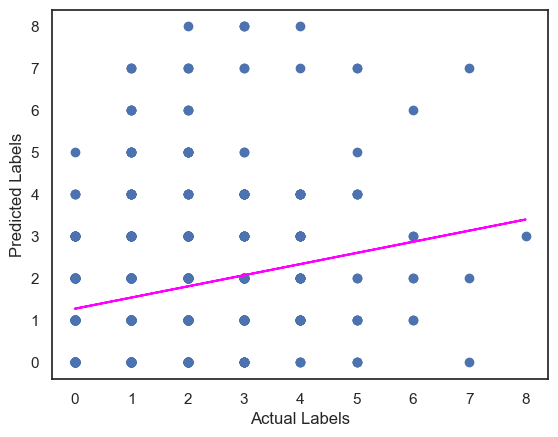

Visualización del árbol de decisión para goles visitantes:


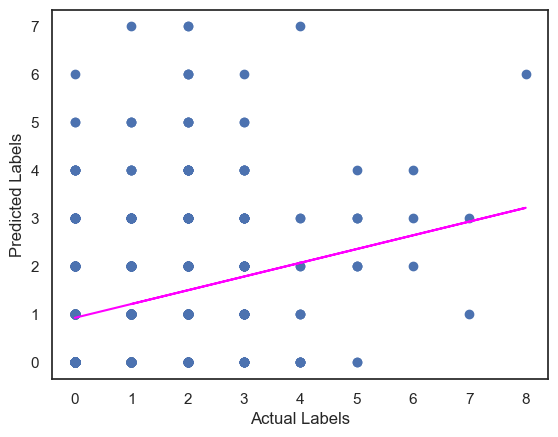

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Entrenar el modelo de árbol de decisión para predecir los goles locales
model_tree_local = DecisionTreeRegressor().fit(X_train, y_local_train)
print("Modelo de árbol de decisión para goles locales entrenado.")

# Entrenar el modelo de árbol de decisión para predecir los goles visitantes
model_tree_visitante = DecisionTreeRegressor().fit(X_train, y_visitante_train)
print("Modelo de árbol de decisión para goles visitantes entrenado.")

# Evaluar el modelo de árbol de decisión para goles locales
print("Evaluación del modelo de árbol de decisión para goles locales:")
evaluate_regression_model(model_tree_local, X_test, y_local_test)

# Evaluar el modelo de árbol de decisión para goles visitantes
print("Evaluación del modelo de árbol de decisión para goles visitantes:")
evaluate_regression_model(model_tree_visitante, X_test, y_visitante_test)

# Exportar el texto del árbol de decisión para goles locales
tree_text_local = export_text(model_tree_local)
print("Árbol de decisión para goles locales:")
print(tree_text_local)

# Exportar el texto del árbol de decisión para goles visitantes
tree_text_visitante = export_text(model_tree_visitante)
print("Árbol de decisión para goles visitantes:")
print(tree_text_visitante)

# Visualizar el árbol de decisión para goles locales
print("Visualización del árbol de decisión para goles locales:")
visualize_regression(model_tree_local, X_test, y_local_test)

# Visualizar el árbol de decisión para goles visitantes
print("Visualización del árbol de decisión para goles visitantes:")
visualize_regression(model_tree_visitante, X_test, y_visitante_test)


 Cada nodo evalúa una característica del conjunto de datos y, dependiendo del valor de esa característica, el árbol sigue una rama específica hasta llegar a un nodo final donde se hace una predicción sobre el número de goles. Ahora voy a evaluar este modelo. El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, tiene un margen de mejora especialmente en términos de reducir el error y mejorar la capacidad del modelo para explicar la variabilidad en los datos de destino ya que en estos momentos es de un 32%.



### Ensemble Algorithm

En lugar de depender de un solo modelo,  los algoritmos de conjunto utilizan la idea de que la combinación de múltiples modelos puede producir predicciones más precisas y robustas que cualquier modelo individual. Voy a entrenar un modelo de regresión utilizando el algoritmo Random Forest Regressor y Gradient Boosting.

Modelo Random Forest para goles locales entrenado.
Modelo Random Forest para goles visitantes entrenado.
Evaluación del modelo Random Forest para goles locales:
MSE: 1.6236228304405873
RMSE: 1.2742145935597298
R2: 0.16982109420713865
Evaluación del modelo Random Forest para goles visitantes:
MSE: 1.3062515353805073
RMSE: 1.1429136167622238
R2: 0.1207783115010187
Visualización del modelo Random Forest para goles locales:


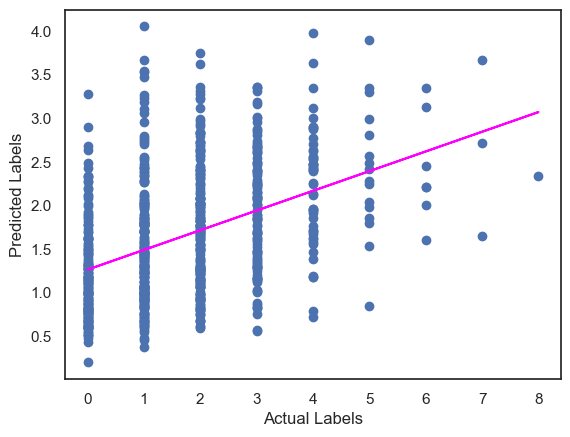

Visualización del modelo Random Forest para goles visitantes:


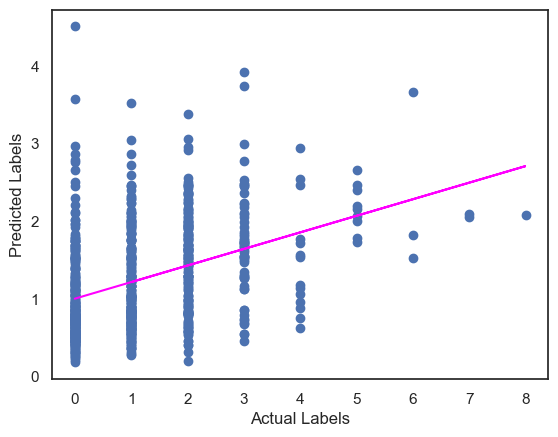

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo Random Forest para predecir los goles locales
model_random_local = RandomForestRegressor().fit(X_train, y_local_train)
print("Modelo Random Forest para goles locales entrenado.")

# Entrenar el modelo Random Forest para predecir los goles visitantes
model_random_visitante = RandomForestRegressor().fit(X_train, y_visitante_train)
print("Modelo Random Forest para goles visitantes entrenado.")

# Evaluar el modelo Random Forest para goles locales
print("Evaluación del modelo Random Forest para goles locales:")
evaluate_regression_model(model_random_local, X_test, y_local_test)

# Evaluar el modelo Random Forest para goles visitantes
print("Evaluación del modelo Random Forest para goles visitantes:")
evaluate_regression_model(model_random_visitante, X_test, y_visitante_test)

# Visualizar el modelo Random Forest para goles locales
print("Visualización del modelo Random Forest para goles locales:")
visualize_regression(model_random_local, X_test, y_local_test)

# Visualizar el modelo Random Forest para goles visitantes
print("Visualización del modelo Random Forest para goles visitantes:")
visualize_regression(model_random_visitante, X_test, y_visitante_test)


Modelo Gradient Boosting para goles locales entrenado.
Modelo Gradient Boosting para goles visitantes entrenado.
Evaluación del modelo Gradient Boosting para goles locales:
MSE: 1.6047931161262197
RMSE: 1.2668042927485759
R2: 0.17944896549153788
Evaluación del modelo Gradient Boosting para goles visitantes:
MSE: 1.2633958922195407
RMSE: 1.1240088488172773
R2: 0.14962391276625964
Visualización del modelo Gradient Boosting para goles locales:


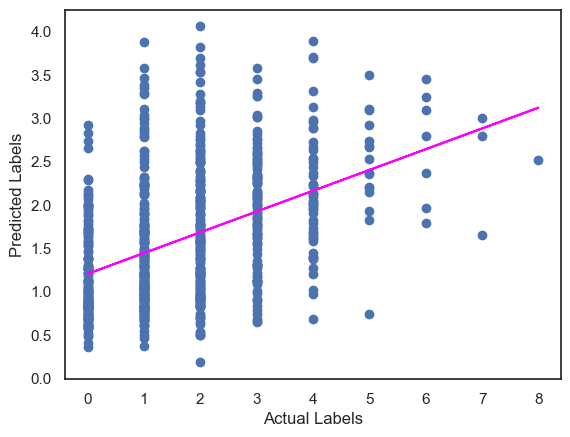

Visualización del modelo Gradient Boosting para goles visitantes:


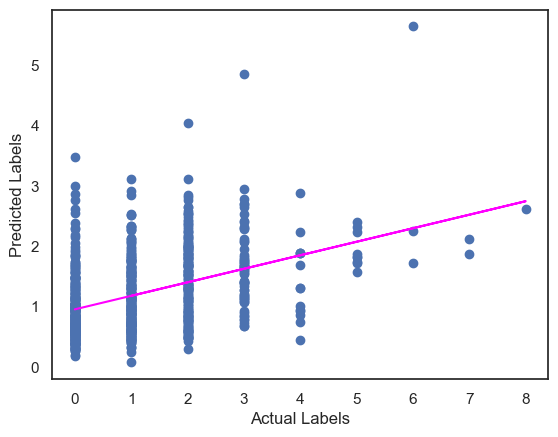

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Entrenar el modelo Gradient Boosting para predecir los goles locales
model_gradient_local = GradientBoostingRegressor().fit(X_train, y_local_train)
print("Modelo Gradient Boosting para goles locales entrenado.")

# Entrenar el modelo Gradient Boosting para predecir los goles visitantes
model_gradient_visitante = GradientBoostingRegressor().fit(X_train, y_visitante_train)
print("Modelo Gradient Boosting para goles visitantes entrenado.")

# Evaluar el modelo Gradient Boosting para goles locales
print("Evaluación del modelo Gradient Boosting para goles locales:")
evaluate_regression_model(model_gradient_local, X_test, y_local_test)

# Evaluar el modelo Gradient Boosting para goles visitantes
print("Evaluación del modelo Gradient Boosting para goles visitantes:")
evaluate_regression_model(model_gradient_visitante, X_test, y_visitante_test)

# Visualizar el modelo Gradient Boosting para goles locales
print("Visualización del modelo Gradient Boosting para goles locales:")
visualize_regression(model_gradient_local, X_test, y_local_test)

# Visualizar el modelo Gradient Boosting para goles visitantes
print("Visualización del modelo Gradient Boosting para goles visitantes:")
visualize_regression(model_gradient_visitante, X_test, y_visitante_test)



· El modelo de ensemble (Gradient Boosting en este caso) muestra el mejor rendimiento en términos de MSE, RMSE y R2 en comparación con los otros modelos.

· El modelo Lasso parece tener el peor rendimiento, lo que indica que no explica tan bien la variabilidad de los datos.

· El árbol de decisión tiene un rendimiento similar al Lasso, aunque ligeramente mejor, pero aún así es superado por la regresión lineal y el ensemble algorithm en términos de métricas de evaluación.

· El ensemble algorithm muestra un rendimiento bastante bueno, con el MSE más bajo y un R2 alto en comparación con los otros modelos, lo que sugiere que puede ser una opción sólida para hacer predicciones precisas.

### Optimización con hiperparámetros para GradientBosoting

A continuación vamos a probar la técnica de ajuste de hiperparámetros buscando la mejor combinación de estos para el estimador GradientBoostingRegressor utilizando la métrica de puntuación R2 a través de la técnica de búsqueda en cuadrícula.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define el modelo Gradient Boosting para los goles locales
alg_local = GradientBoostingRegressor()

# Define el diccionario de parámetros a probar para los goles locales
params_local = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 150]
}

# Realiza la búsqueda de hiperparámetros utilizando GridSearchCV para los goles locales
gridsearch_local = GridSearchCV(alg_local, params_local, scoring='r2', cv=3)
gridsearch_local.fit(X_train, y_local_train)

# Imprime la mejor combinación de parámetros encontrada para los goles locales
print("Mejor combinacion de parametros para goles locales:", gridsearch_local.best_params_)

# Define el modelo Gradient Boosting para los goles visitantes
alg_visitante = GradientBoostingRegressor()

# Define el diccionario de parámetros a probar para los goles visitantes
params_visitante = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 150]
}

# Realiza la búsqueda de hiperparámetros utilizando GridSearchCV para los goles visitantes
gridsearch_visitante = GridSearchCV(alg_visitante, params_visitante, scoring='r2', cv=3)
gridsearch_visitante.fit(X_train, y_visitante_train)

# Imprime la mejor combinación de parámetros encontrada para los goles visitantes
print("Mejor combinacion de parametros para goles visitantes:", gridsearch_visitante.best_params_)

Mejor combinacion de parametros para goles locales: {'learning_rate': 0.1, 'n_estimators': 50}
Mejor combinacion de parametros para goles visitantes: {'learning_rate': 0.1, 'n_estimators': 50}


In [25]:
# Mejor modelo encontrado en la búsqueda para los goles locales
model_GB_Hiper_local = gridsearch_local.best_estimator_
print("Mejor modelo para goles locales encontrado en la búsqueda:", model_GB_Hiper_local)

# Mejor modelo encontrado en la búsqueda para los goles visitantes
model_GB_Hiper_visitante = gridsearch_visitante.best_estimator_
print("Mejor modelo para goles visitantes encontrado en la búsqueda:", model_GB_Hiper_visitante)

Mejor modelo para goles locales encontrado en la búsqueda: GradientBoostingRegressor(n_estimators=50)
Mejor modelo para goles visitantes encontrado en la búsqueda: GradientBoostingRegressor(n_estimators=50)


In [26]:
# Evaluación del modelo para los goles locales
print("Evaluación del modelo para los goles locales:")
mse_GB_local, rmse_GB_local, r2_GB_local = evaluate_regression_model(model_GB_Hiper_local, X_test, y_local_test)

# Evaluación del modelo para los goles visitantes
print("Evaluación del modelo para los goles visitantes:")
mse_GB_visitante, rmse_GB_visitante, r2_GB_visitante = evaluate_regression_model(model_GB_Hiper_visitante, X_test, y_visitante_test)


Evaluación del modelo para los goles locales:
MSE: 1.5844282450718434
RMSE: 1.258740737829615
R2: 0.18986178184984626
Evaluación del modelo para los goles visitantes:
MSE: 1.2585350697311075
RMSE: 1.1218444944514847
R2: 0.15289567202549692


Gráfica predicha vs actual para los goles locales:


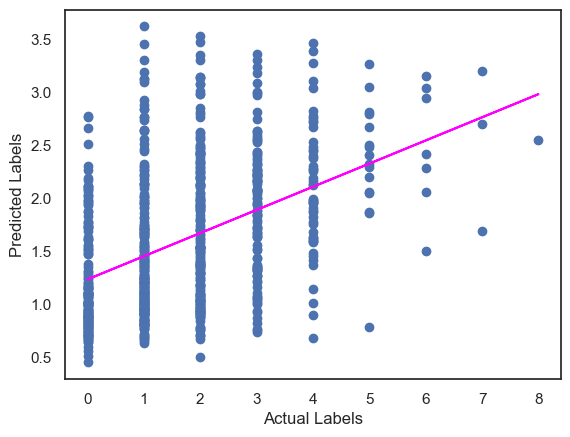

Gráfica predicha vs actual para los goles visitantes:


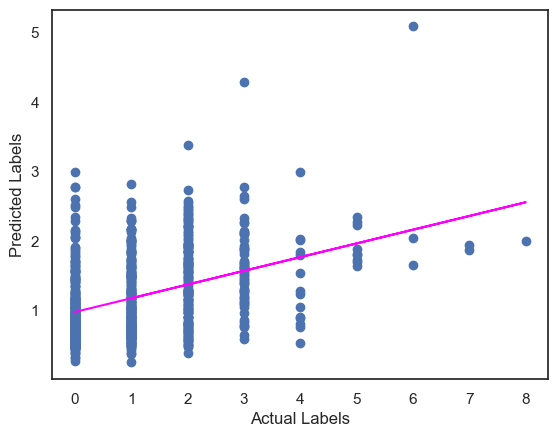

In [27]:
# Gráfica predicha vs actual para los goles locales
print("Gráfica predicha vs actual para los goles locales:")
visualize_regression(model_GB_Hiper_local, X_test, y_local_test)

# Gráfica predicha vs actual para los goles visitantes
print("Gráfica predicha vs actual para los goles visitantes:")
visualize_regression(model_GB_Hiper_visitante, X_test, y_visitante_test)


En este caso la evaluación no mejora significativamente.

## Preprocesamiento de datos con pipeline

A continuación, vamos a entrenar un modelo de regresión utilizando un pipeline con los modelos random forest y gradient boosting, ya que son los mejores modelos que nos han salido, en el que se aplican diferentes transformaciones a las características de los datos antes de ajustar el modelo:

- Escalado de características numéricas: Normalizar características numéricas para que estén en la misma escala. Esto evita que las características con valores grandes produzcan coeficientes que afecten desproporcionadamente las predicciones del modelo.

- Codificación de variables categóricas: Convertir características categóricas en representaciones numéricas. Esto se realiza porque la mayoría de los modelos de aprendizaje automático funcionan mejor con características numéricas en lugar de valores de texto.

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Seleccionar las características numéricas a escalar
numeric_features = ['%_Victorias_Local', '%_Empate', '%_Victoria_Visitante', '%_Equipo1_Ganado',
                    '%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', 
                    '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', 
                    '1_ValorJugadores', '1_MediaJugadores', '%_2_G_Temporada', '%_2_G_Temporada_L', 
                    '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G', '2_Media_G_Local', 
                    '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']

#Definir el preprocesador como un Pipeline
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])


Modelo para goles locales entrenado.
Modelo para goles visitantes entrenado.
Evaluación del modelo para goles locales:
MSE: 3.3570908435576396
RMSE: 1.8322365686661861
R2: -0.7165230439606696
Evaluación del modelo para goles visitantes:
MSE: 1.268384715447528
RMSE: 1.1262258723042764
R2: 0.14626599779863725
Gráfico predicho vs actual para los goles locales:


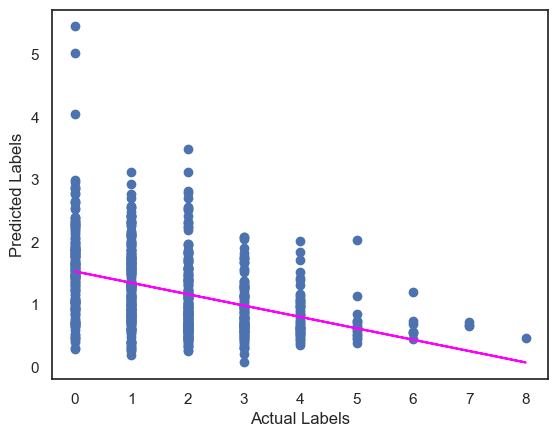

Gráfico predicho vs actual para los goles visitantes:


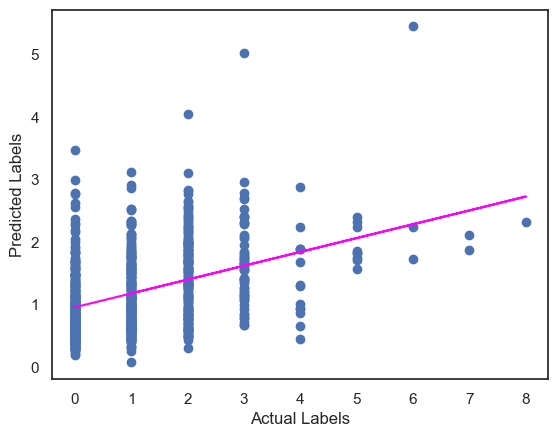

In [29]:
# Crear un Pipeline completo con el preprocesador y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])


# Entrenar el Pipeline para predecir los goles locales
model_pipe_GB_local = pipeline.fit(X_train, y_local_train)
print("Modelo para goles locales entrenado.")

# Entrenar el Pipeline para predecir los goles visitantes
model_pipe_GB_visitante = pipeline.fit(X_train, y_visitante_train)
print("Modelo para goles visitantes entrenado.")

# Evaluación del modelo para los goles locales
print("Evaluación del modelo para goles locales:")
evaluate_regression_model(model_pipe_GB_local, X_test, y_local_test)

# Evaluación del modelo para los goles visitantes
print("Evaluación del modelo para goles visitantes:")
evaluate_regression_model(model_pipe_GB_visitante, X_test, y_visitante_test)

# Gráfico predicho vs actual para los goles locales
print("Gráfico predicho vs actual para los goles locales:")
visualize_regression(model_pipe_GB_local, X_test, y_local_test)

# Gráfico predicho vs actual para los goles visitantes
print("Gráfico predicho vs actual para los goles visitantes:")
visualize_regression(model_pipe_GB_visitante, X_test, y_visitante_test)

Modelo de regresión aleatoria (Random Forest) para goles locales entrenado.
Evaluación del modelo para goles locales:
MSE: 1.6089327102803739
RMSE: 1.268437113254092
R2: 0.17733233859957076
Gráfico predicho vs actual para goles locales:


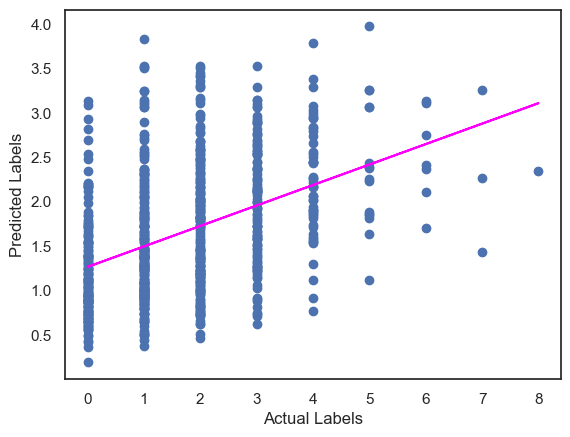

Modelo de regresión aleatoria (Random Forest) para goles visitantes entrenado.
Evaluación del modelo para goles visitantes:
MSE: 1.3127269692923897
RMSE: 1.1457429769771184
R2: 0.11641977734158482
Gráfico predicho vs actual para goles visitantes:


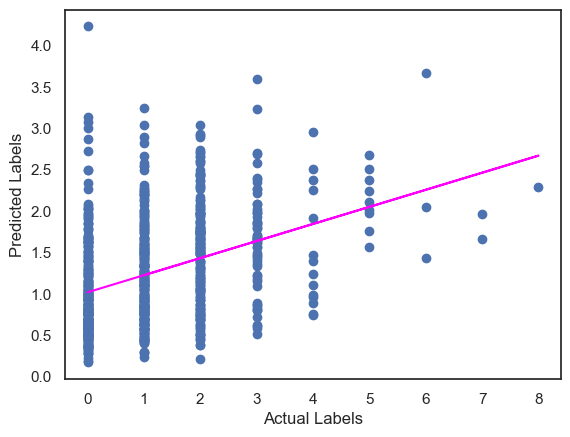

In [30]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# Entrenar el modelo para predecir los goles locales
model_pipe_RF_local = pipeline.fit(X_train, y_local_train)
print("Modelo de regresión aleatoria (Random Forest) para goles locales entrenado.")

# Evaluar el modelo para goles locales
print("Evaluación del modelo para goles locales:")
mse_RF_local, rmse_RF_local, r2_RF_local = evaluate_regression_model(model_pipe_RF_local, X_test, y_local_test)

# Gráfico predicho vs actual para goles locales
print("Gráfico predicho vs actual para goles locales:")
visualize_regression(model_pipe_RF_local, X_test, y_local_test)

# Entrenar el modelo para predecir los goles visitantes
model_pipe_RF_visitante = pipeline.fit(X_train, y_visitante_train)
print("Modelo de regresión aleatoria (Random Forest) para goles visitantes entrenado.")

# Evaluar el modelo para goles visitantes
print("Evaluación del modelo para goles visitantes:")
mse_RF_visitante, rmse_RF_visitante, r2_RF_visitante = evaluate_regression_model(model_pipe_RF_visitante, X_test, y_visitante_test)

# Gráfico predicho vs actual para goles visitantes
print("Gráfico predicho vs actual para goles visitantes:")
visualize_regression(model_pipe_RF_visitante, X_test, y_visitante_test)

En mi caso normalizar los datos no afecta a mi modelo boost gradient, pero si mejora el modelo de random forest. Evaluando todos los modelos podemos ver que los mejores valores valores lo tiene el modelo gradient boosting ajustado con hiperparametros, en concreto con 50 estimadores. 

Voy a hacer una última prueba normalizando los datos mediante el logaritmo para ver si mejoraría los modelos, ya que algunos valores estén sesgados o tengan valores atípicos.

La estandarización de las características mediante el pipeline que hemos hecho anteriormente implica transformarlas de modo que tengan una media de cero y una desviación estándar de uno. Esto se logra restando la media de cada característica y dividiendo por su desviación estándar.


Tabla resumen de las métricas de los mejores modelos.

In [31]:
import pandas as pd

# Crear un diccionario con las métricas
metricas_modelos = {
    'RL Local': {'MSE': mse_lineal_local, 'RMSE': rmse_lineal_local, 'R2': r2_lineal_local},
    'GB Local': {'MSE': mse_GB_local, 'RMSE': rmse_GB_local, 'R2': r2_GB_local},
    'RF Local': {'MSE': mse_RF_local, 'RMSE': rmse_RF_local, 'R2': r2_RF_local},
    'RL Visitante': {'MSE': mse_lineal_visitante, 'RMSE': rmse_lineal_visitante, 'R2': r2_lineal_visitante},
    'GB Visitante': {'MSE': mse_GB_visitante, 'RMSE': rmse_GB_visitante, 'R2': r2_GB_visitante},
    'RF Visitante': {'MSE': mse_RF_visitante, 'RMSE': rmse_RF_visitante, 'R2': r2_RF_visitante}
}

# Convertir el diccionario en un DataFrame de pandas
df_metricas = pd.DataFrame(metricas_modelos)

# Transponer el DataFrame para tener los modelos como filas y las métricas como columnas
df_metricas = df_metricas.transpose()

# Imprimir el DataFrame
df_metricas


,MSE,RMSE,R2
RL Local,1.626235,1.275239,0.168486
GB Local,1.584428,1.258741,0.189862
RF Local,1.608933,1.268437,0.177332
RL Visitante,1.315655,1.147020,0.114449
GB Visitante,1.258535,1.121844,0.152896
RF Visitante,1.312727,1.145743,0.116420


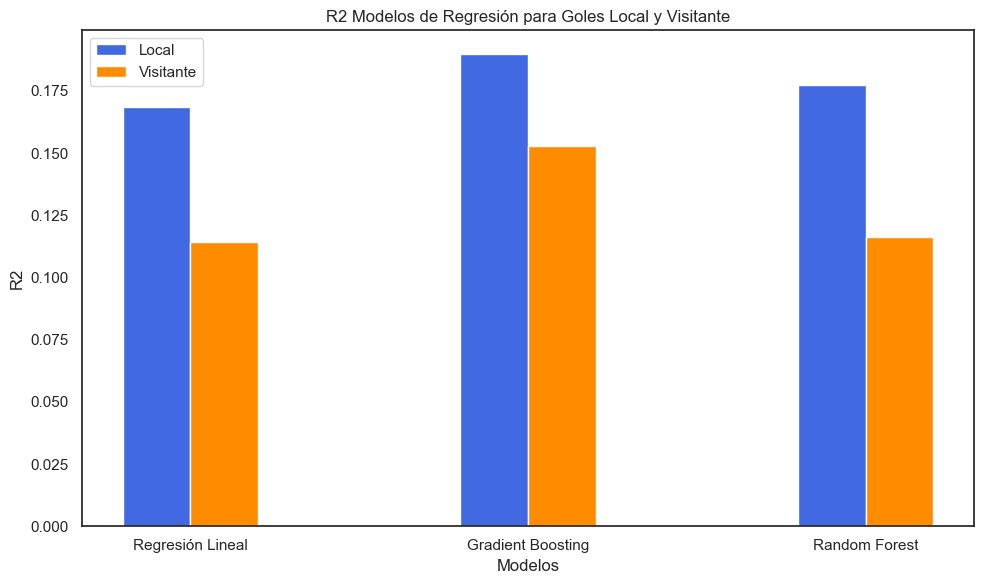

In [32]:
import matplotlib.pyplot as plt

# Obtener los datos del DataFrame
r2_local = df_metricas.loc[df_metricas.index.str.contains('Local'), 'R2'].values
r2_visitante = df_metricas.loc[df_metricas.index.str.contains('Visitante'), 'R2'].values
modelos = ['Regresión Lineal', 'Gradient Boosting', 'Random Forest']  # Nombres de los modelos

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.20
index = range(len(modelos))

# Barras para los modelos locales
plt.bar(index, r2_local, bar_width, label='Local', color='royalblue')

# Barras para los modelos visitantes
plt.bar([i + bar_width for i in index], r2_visitante, bar_width, label='Visitante', color='darkorange')

# Configuración del gráfico
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.title('R2 Modelos de Regresión para Goles Local y Visitante')
plt.xticks([i + bar_width / 2 for i in index], modelos)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [33]:
# Guardar el primer gráfico (R2)
plt.savefig('../Resultados/R2_regresion.png')

<Figure size 640x480 with 0 Axes>

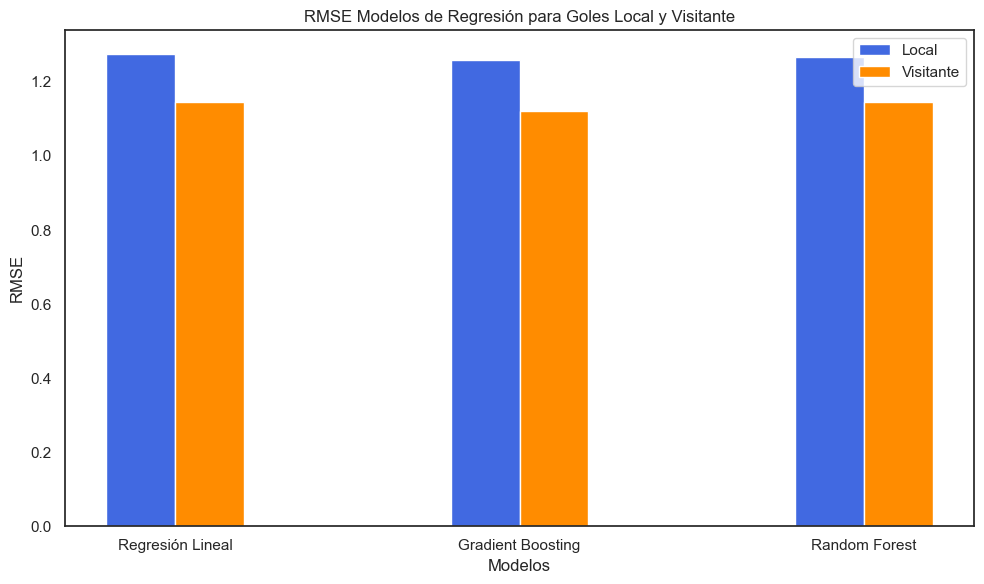

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener los datos del DataFrame
rmse_local = df_metricas.loc[df_metricas.index.str.contains('Local'), 'RMSE'].values
rmse_visitante = df_metricas.loc[df_metricas.index.str.contains('Visitante'), 'RMSE'].values
modelos = ['Regresión Lineal', 'Gradient Boosting', 'Random Forest']  # Nombres de los modelos

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.20
index = np.arange(len(modelos))

# Barras para RMSE local
plt.bar(index - bar_width/2, rmse_local, bar_width, label='Local', color='royalblue')

# Barras para RMSE visitante
plt.bar(index + bar_width/2, rmse_visitante, bar_width, label='Visitante', color='darkorange')

# Configuración del gráfico
plt.xlabel('Modelos')
plt.ylabel('RMSE')
plt.title('RMSE Modelos de Regresión para Goles Local y Visitante')
plt.xticks(index, modelos)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [35]:
# Guardar el primer gráfico (R2)
plt.savefig('../Resultados/RMSE_regresion.png')

<Figure size 640x480 with 0 Axes>

### Predicciones

In [38]:
import pandas as pd

# Cargar los datos
data = pd.read_csv('../dataframe/champions_23_24.csv')

# Seleccionar las últimas 4 filas que son los partidos de semifinales
ultimos_partidos = data.tail(4)

data = pd.read_csv('../dataframe/champions_23_24.csv')
columnas_numericas = ultimos_partidos.drop(['GolesLocal', 'GolesVisitante', 'Temporada', 'Ronda', 'Evento', 'VictoriaLocal', 'VictoriaVisitante', 'Empate', 'idPartido'], axis=1)
X_preprocesados = preprocesamiento(data, columnas_numericas)

# Predicciones para los goles locales
predicciones_locales = model_GB_Hiper_local.predict(X_preprocesados)
print("Predicciones de goles locales GB:", predicciones_locales)

# Predicciones para los goles visitantes
predicciones_visitantes = model_GB_Hiper_visitante.predict(X_preprocesados)
print("Predicciones de goles visitantes GB:", predicciones_visitantes)



Predicciones de goles locales GB: [0.78546128 0.82095923 2.32982514 2.31313062]
Predicciones de goles visitantes GB: [1.66094426 2.55505539 0.47150725 0.73041244]
